In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Estética dos Gráficos
sns.set_style('darkgrid')

In [3]:
# tirando a notação científica
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

### Importando a Base de Dados para um DataFrame 

In [4]:
data = pd.read_excel('AdventureWorks.xlsx')
data.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


### Informações relevante sobre a base de dados

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 non-null    object        
 15  Cor   

In [6]:
data.describe()

,ID Loja,ID Produto,ID Cliente,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda
count,904.00,904.00,904.00,904.00,904.00,904.00,904.00,904.00
mean,270.02,1225.24,19029.09,272.01,742.53,62.95,689.12,6620.14
std,50.96,706.70,96.43,129.77,368.59,148.95,822.36,4319.41
min,199.00,366.00,18815.00,5.09,9.99,2.00,0.00,159.84
25%,199.00,384.00,18964.75,324.69,758.00,6.00,0.00,3920.00
50%,306.00,1202.00,19060.00,330.66,980.00,9.00,461.17,5798.70
75%,307.00,1226.00,19107.00,348.58,998.00,17.00,1005.08,7986.00
max,307.00,2497.00,19145.00,348.58,999.00,1560.00,6272.00,29400.00


### Qual a Receita Total?

In [7]:
round( data['Valor Venda'].sum(), 2 )

5984606.14

### Qual o Custo Total?

In [8]:
data['Custo Total'] = data['Custo Unitário']*data['Quantidade']

In [9]:
# Visualizando a nova coluna criada
data[['Custo Total','Custo Unitário','Quantidade']]

,Custo Total,Custo Unitário,Quantidade
0,2091.48,348.58,6
1,2091.48,348.58,6
2,2091.48,348.58,6
3,2091.48,348.58,6
4,2091.48,348.58,6
...,...,...,...
899,1985.94,330.99,6
900,1948.14,324.69,6
901,1948.14,324.69,6
902,1985.94,330.99,6


In [10]:
round( data['Custo Total'],2 ).sum()

2486783.05

### Qual o Lucro Total?

In [11]:
data['Lucro'] = data['Valor Venda'] - data['Custo Total']

In [12]:
data[['Lucro','Valor Venda','Custo Total']]

,Lucro,Valor Venda,Custo Total
0,2456.52,4548.00,2091.48
1,2456.52,4548.00,2091.48
2,2456.52,4548.00,2091.48
3,2456.52,4548.00,2091.48
4,2456.52,4548.00,2091.48
...,...,...,...
899,3588.48,5574.42,1985.94
900,2755.86,4704.00,1948.14
901,2755.86,4704.00,1948.14
902,2809.26,4795.20,1985.94


In [13]:
round( data['Lucro'],2 ).sum()

3497823.0

In [14]:
# Ou ainda
round( (data['Valor Venda']-data['Custo Total']),2 ).sum()

3497823.0

### Quantos dias são necessários para enviar o produto

In [15]:
data['Tempo de Envio'] = data['Data Envio'] - data['Data Venda']

In [16]:
data[['Tempo de Envio','Data Envio','Data Venda']]

,Tempo de Envio,Data Envio,Data Venda
0,20 days,2008-05-29,2008-05-09
1,5 days,2008-05-17,2008-05-12
2,6 days,2008-05-20,2008-05-14
3,6 days,2008-05-27,2008-05-21
4,7 days,2008-06-27,2008-06-20
...,...,...,...
899,13 days,2008-04-04,2008-03-22
900,11 days,2008-10-15,2008-10-04
901,4 days,2008-12-15,2008-12-11
902,4 days,2008-12-21,2008-12-17


### Qual a média do tempo de envio para cada Marca?

In [17]:
# Verificando quantas marcas temos
data['Marca'].unique()

array(['Adventure Works', 'Fabrikam', 'Contoso'], dtype=object)

In [18]:
# Verificando o tipo da coluna 'Tempo de Envio'
data['Tempo de Envio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 904 entries, 0 to 903
Series name: Tempo de Envio
Non-Null Count  Dtype          
--------------  -----          
904 non-null    timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 7.2 KB


In [19]:
# Mudando o tipo da coluna 'Tempo de Envio' para int64
data['Tempo de Envio'] = data['Tempo de Envio'].dt.days

In [20]:
data['Tempo de Envio'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 904 entries, 0 to 903
Series name: Tempo de Envio
Non-Null Count  Dtype
--------------  -----
904 non-null    int64
dtypes: int64(1)
memory usage: 7.2 KB


In [21]:
data[['Tempo de Envio','Marca']].groupby('Marca').mean()

,Tempo de Envio
Marca,
Adventure Works,8.66
Contoso,8.47
Fabrikam,8.51


### A Base de Dados Possui Valores Ausentes?

In [22]:
data.isna().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo Total       0
Lucro             0
Tempo de Envio    0
dtype: int64

### Qual o Lucro por Ano e por Marca?

In [23]:
# Verificando quantos anos temos
data['Data Venda'].dt.year.unique()

array([2008, 2009], dtype=int64)

In [24]:
data[['Data Venda','Marca','Lucro']].groupby([data['Data Venda'].dt.year,'Marca']).mean()

Lucro
Data Venda Marca                  
2008       Adventure Works 2977.10
           Contoso          705.20
           Fabrikam        5444.13
2009       Adventure Works 3002.93
           Contoso         1502.81
           Fabrikam        4971.59

In [25]:
# Criando nova Coluna correspondente ao Ano de Venda
data['Ano Venda'] = data['Data Venda'].dt.year

In [26]:
data[['Ano Venda','Marca','Lucro']].groupby(['Ano Venda','Marca']).mean()

Lucro
Ano Venda Marca                  
2008      Adventure Works 2977.10
          Contoso          705.20
          Fabrikam        5444.13
2009      Adventure Works 3002.93
          Contoso         1502.81
          Fabrikam        4971.59

### Qual o Total de Produtos Vendidos?

In [27]:
data_aux=data[['Quantidade','Produto']].groupby('Produto').sum().sort_values('Quantidade',ascending=False)
data_aux

,Quantidade
Produto,
Headphone Adapter for Contoso Phone E130 Silver,25232
Headphone Adapter for Contoso Phone E130 White,25008
Adventure Works Laptop15.4W M1548 Black,1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
Adventure Works Laptop15.4W M1548 Red,1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


### Gráfico do Total de Produtos Vendidos

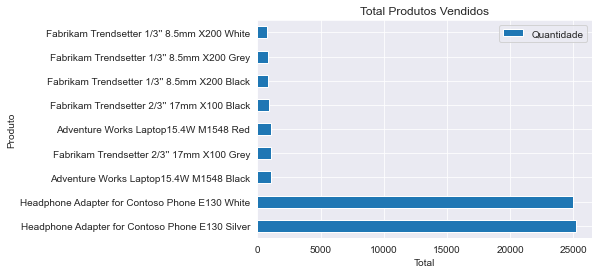

In [28]:
data_aux.plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

### Gráfico do Lucro Total

In [29]:
data_aux=data[['Ano Venda','Lucro']].groupby('Ano Venda').sum()
data_aux

,Lucro
Ano Venda,
2008,1920077.71
2009,1577745.38


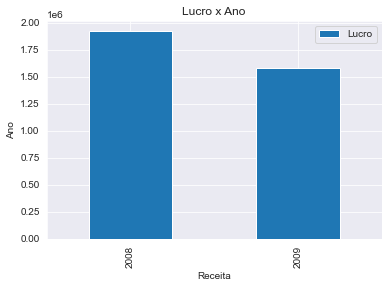

In [30]:
data_aux.plot.bar(title="Lucro x Ano")
plt.xlabel("Receita")
plt.ylabel("Ano");

### Gráfico das Vendas em 2009

In [31]:
data[data['Data Venda'].dt.year==2009][['Data Venda','Lucro']]

,Data Venda,Lucro
11,2009-05-02,2456.52
12,2009-05-16,2456.52
13,2009-05-31,2456.52
14,2009-06-28,2456.52
15,2009-07-08,2456.52
...,...,...
890,2009-12-23,2755.86
895,2009-01-11,3049.86
896,2009-03-04,2755.86
897,2009-06-12,3408.66


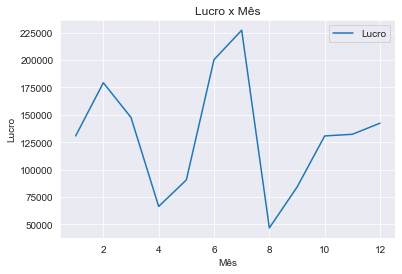

In [32]:
data[data['Data Venda'].dt.year==2009][['Data Venda','Lucro']].groupby(data['Data Venda'].dt.month).sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

### Gráfico do Lucro de cada Marca

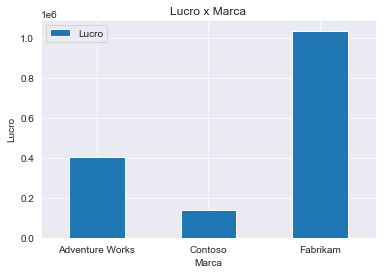

In [33]:
data[data['Data Venda'].dt.year==2009][['Marca','Lucro']].groupby('Marca').sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

### Gráfico do Lucro de cada Classe 

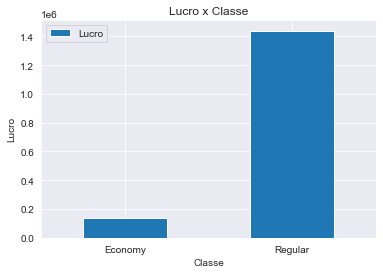

In [34]:
data[data['Data Venda'].dt.year==2009][['Classe','Lucro']].groupby('Classe').sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

### Gráfico Boxplot do 'Templo de Envio'

In [35]:
data['Tempo de Envio'].describe()

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: Tempo de Envio, dtype: float64

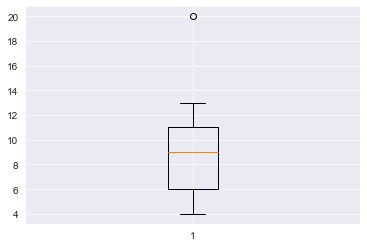

In [36]:
plt.boxplot(data['Tempo de Envio']);

### Histograma do 'Tempo de Envio'

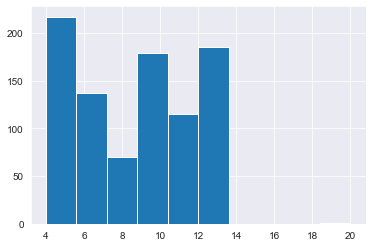

In [37]:
plt.hist(data['Tempo de Envio']);

### Tempo Mínimo de Envio

In [38]:
data['Tempo de Envio'].min()

4

### Tempo Máximo de Envio

In [39]:
data['Tempo de Envio'].max()

20

### Identificação do Outlier

In [40]:
data[data['Tempo de Envio']==20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de Envio,Ano Venda
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20,2008


### Salvando as Alterações em um Arquivo CSV

In [42]:
data.to_csv('AdventureWorks_alterado.csv', index=False)